# Song genre classifier, with spotify data

$Equipo: Daniel Navarro Hernandez, Iñaki Sebastián Orozco García$

Video: https://www.youtube.com/watch?v=4UP4DiC_6Mk

### 1.¿Cuál es el problema que se quiere resolver? ¿Qué preguntas esperaría contestar con el resultado?
Se quiere resolver un problema de clasificación de canciones por género. Se esperaría contestar la pregunta de a qué género pertenece tal canción.
### 2.¿Qué datos son necesario y están disponibles para resolver el problema? ¿Existe un dataset que se pueda utilizar? ¿Es factible generar un dataset?
Hay un dataset ya disponible que contiene datos de 7 géneros distintos sacados de los audio features de Spotify que son públicos. Estos datos tienen características numéricas que se clasifican en:
<ul>
    <li>Popularity</li>
    <li>Danceability</li>
    <li>Enery</li>
    <li>Key</li>
    <li>Loudness</li>
    <li>Mode</li>
</ul>
Dataset: <a href="https://www.kaggle.com/siropo/spotify-multigenre-playlists-data">Spotify Multi-Genre Playlists Data | Kaggle</a>

### 3.¿Qué tipos de análisis espera realizar con los datos?
<p>Se espera realizar un análisis que involucre a las características de los datos para poder clasificarlos por género. </p>

### 4.¿Qué resultados se espera tener? ¿Cuál es el rendimiento mínimo que considera útil para su modelo?
<p>Esperamos tener un modelo que pueda clasificar correctamente canciones dándole datos con esas características que mencionamos arriba, el rendimiento mínimo que consideramos útil sería un modelo con más del 60% de precisión, por que si no cumple con este rendimiento mínimo tendríamos un modelo que tendría resultados casi al azar.</p>



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [5]:
alternative = pd.read_csv("./data/alternative_music_data.csv")
blues = pd.read_csv("./data/blues_music_data.csv")
hiphop = pd.read_csv("./data/hiphop_music_data.csv")
indie_alt = pd.read_csv("./data/indie_alt_music_data.csv")
metal = pd.read_csv("./data/metal_music_data.csv")
pop = pd.read_csv("./data/pop_music_data.csv")
rock = pd.read_csv("./data/rock_music_data.csv")

### We check the shape of the diferent data frames

In [93]:
alternative.shape

(2160, 22)

In [94]:
blues.shape

(2050, 22)

In [95]:
hiphop.shape

(2581, 22)

In [96]:
indie_alt.shape

(4338, 22)

In [97]:
metal.shape

(3045, 22)

In [98]:
pop.shape

(3831, 22)

In [99]:
rock.shape

(8747, 22)

### Agregamos el género a los data frames:

1. alternative
2. blues
3. hiphop
4. indie alt
5. metal
6. pop
7. rock

In [6]:
labels = []
for x in range(alternative.shape[0]):
    labels.append(1)
alternative["labels"] = labels

labels = []
for x in range(blues.shape[0]):
    labels.append(2)
blues["labels"] = labels

labels = []
for x in range(hiphop.shape[0]):
    labels.append(3)
hiphop["labels"] = labels

labels = []
for x in range(indie_alt.shape[0]):
    labels.append(4)
indie_alt["labels"] = labels

labels = []
for x in range(metal.shape[0]):
    labels.append(5)
metal["labels"] = labels

labels = []
for x in range(pop.shape[0]):
    labels.append(6)
pop["labels"] = labels

labels = []
for x in range(rock.shape[0]):
    labels.append(7)
rock["labels"] = labels

### Juntamos los data frames 

In [7]:
data = pd.concat([alternative, blues, hiphop, indie_alt, metal, pop, rock])
dataNoFilter = data
data1 = data
data2 = data
data.shape

(26752, 23)

### Filtramos la información necesaria para entrenar los modelos:

#### Eliminamos la información no numérica que no aporta nada.

In [102]:
data = data.drop(["Artist Name", "Track Name", "Genres", "Playlist", "id", "uri", "track_href", "analysis_url"], axis=1)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26752 entries, 0 to 8746
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Popularity        26752 non-null  int64  
 1   danceability      26752 non-null  float64
 2   energy            26752 non-null  float64
 3   key               26752 non-null  int64  
 4   loudness          26752 non-null  float64
 5   mode              26752 non-null  int64  
 6   speechiness       26752 non-null  float64
 7   acousticness      26752 non-null  float64
 8   instrumentalness  26752 non-null  float64
 9   liveness          26752 non-null  float64
 10  valence           26752 non-null  float64
 11  tempo             26752 non-null  float64
 12  duration_ms       26752 non-null  int64  
 13  time_signature    26752 non-null  int64  
 14  labels            26752 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 3.3 MB


In [104]:
import seaborn as sns

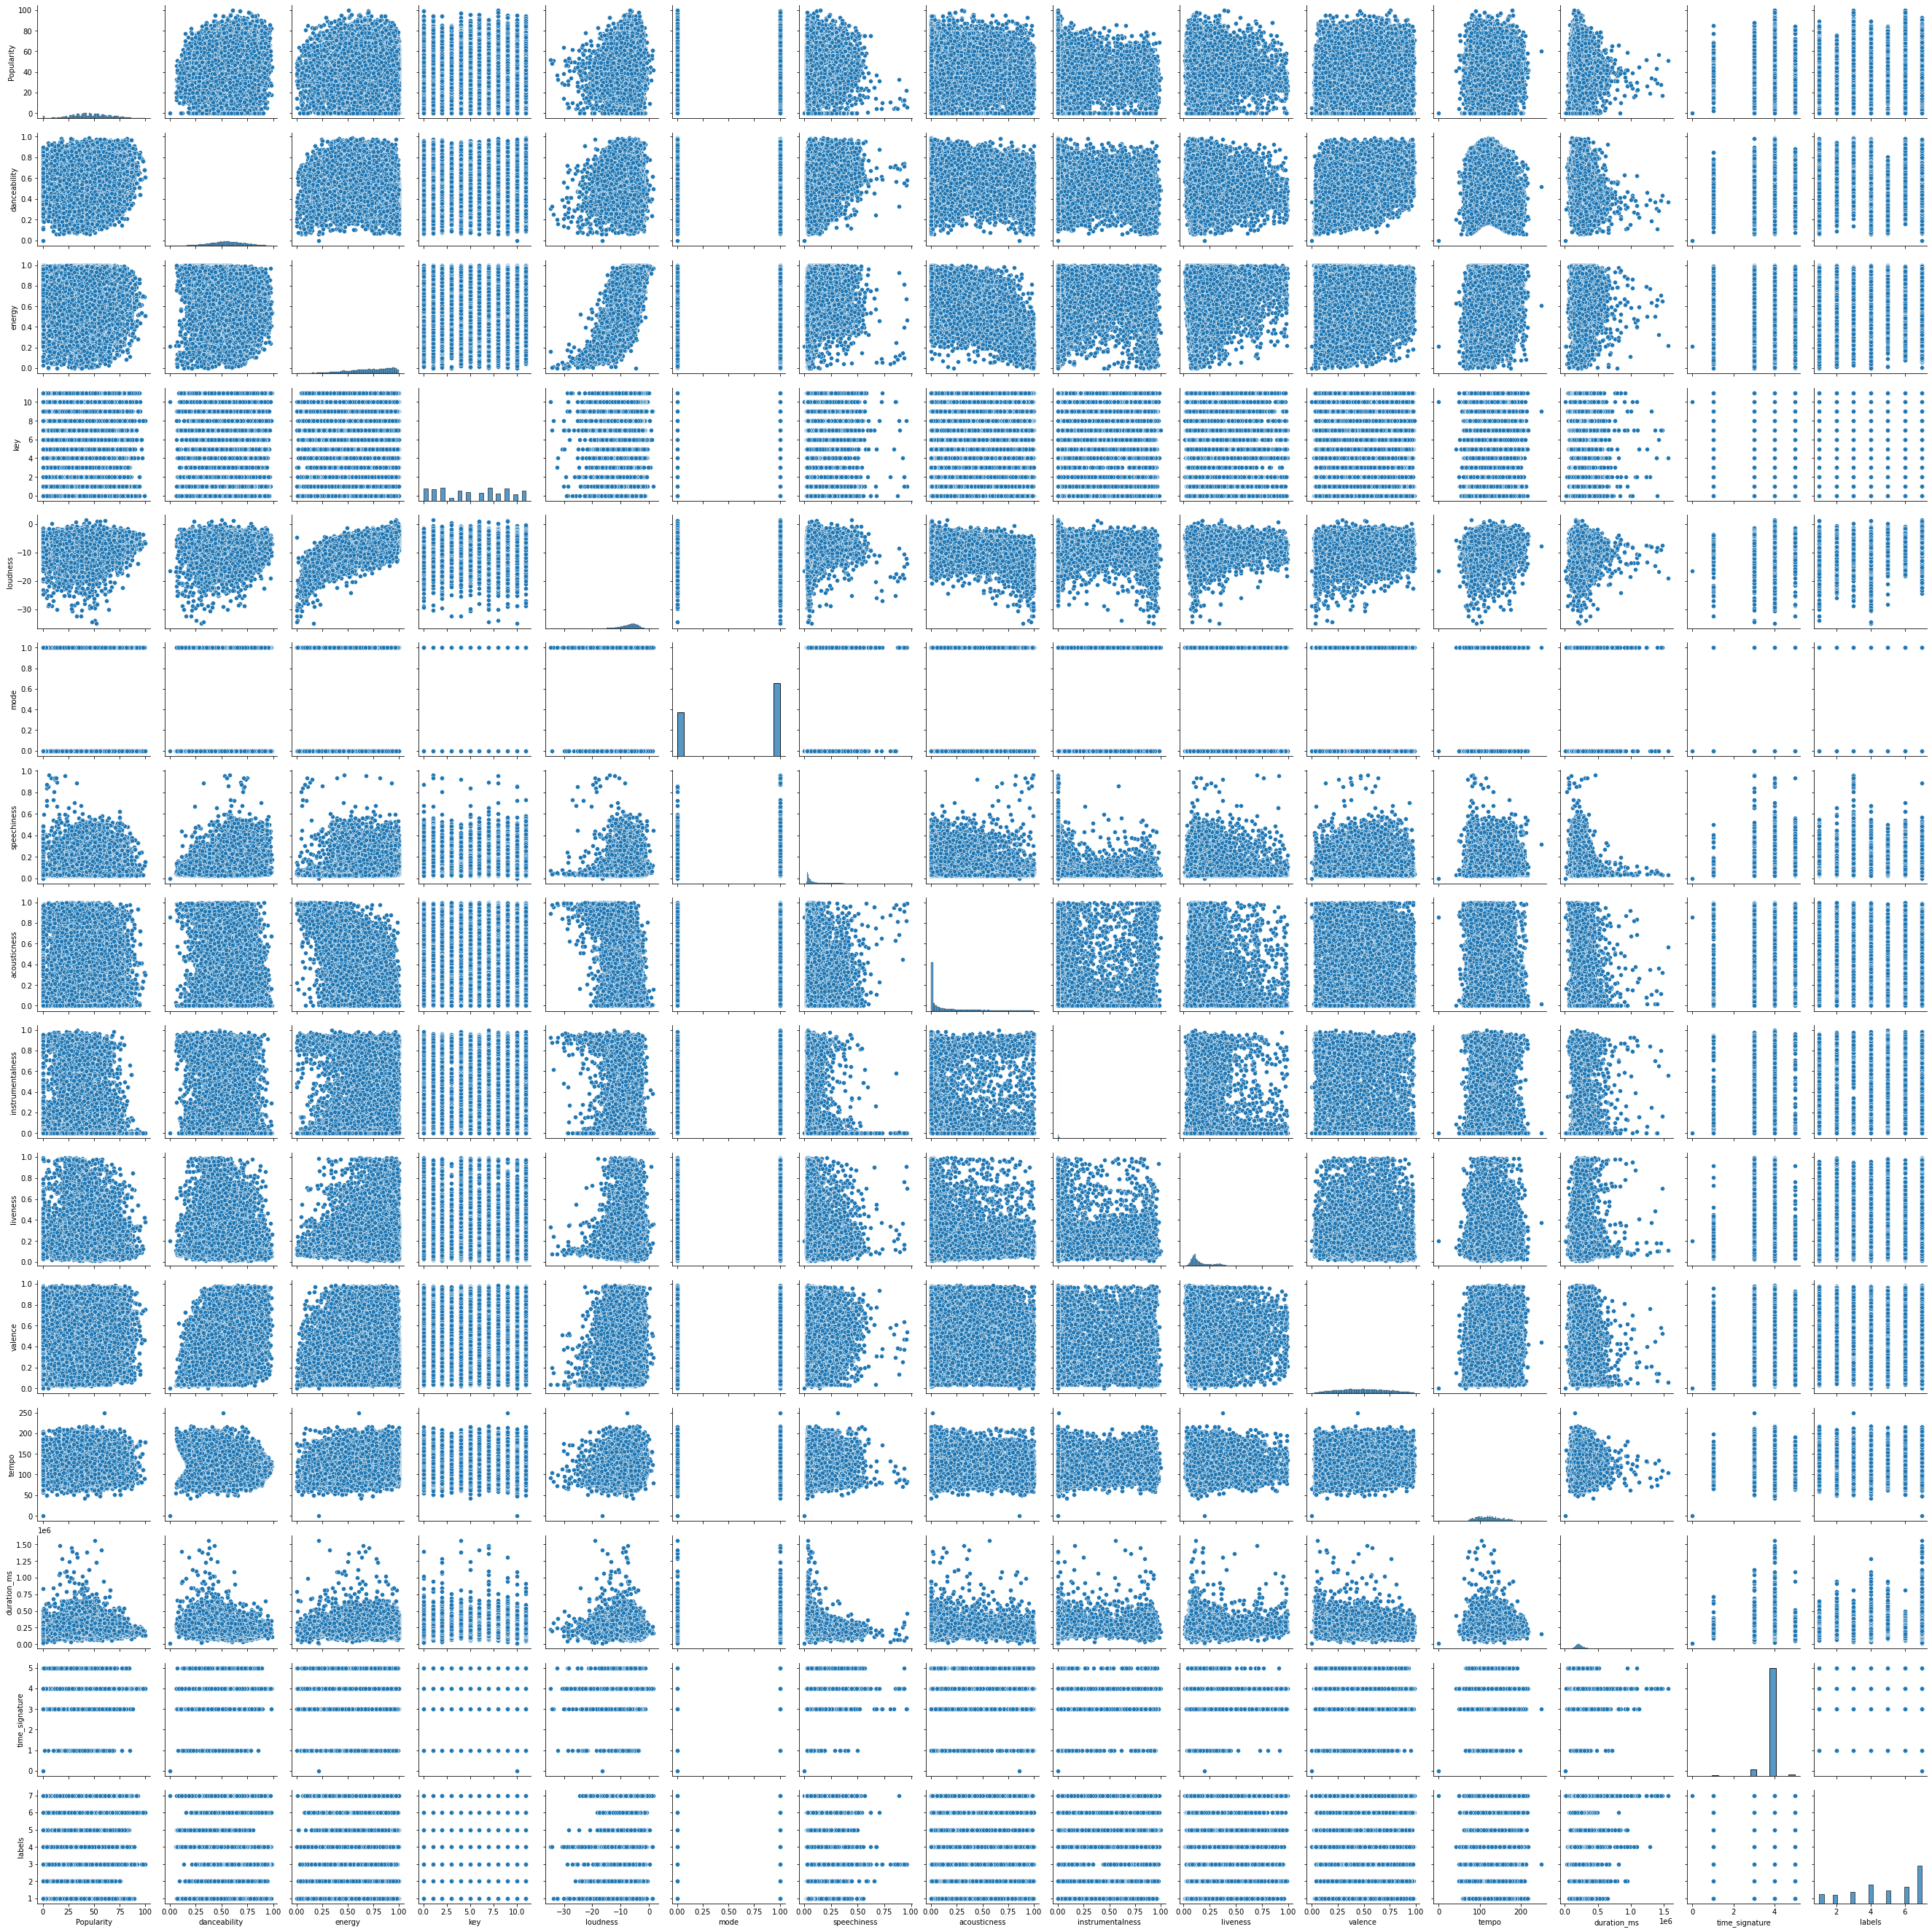

In [105]:
sns.pairplot(data)

#### Podemos ver que la información que estamos usando no parece tener mucha relación entre sí ya que las gráficas no tienen una tendencia visible y en la mayoría de los casos la gráfica muestra que la relación entre los campos es inexistente. Además la información se encuentra distribuida de manera que la clasificación por genero pareciera no tener impacto alguno en los datos presentados para esa canción


### Iniciamos la separación de los datos para el entrenamiento

In [106]:
ydata = data.labels
Xdata = data.drop(["labels"], axis=1)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3, random_state = 1)

## Creación y entrenamiento de modelos

In [108]:
from sklearn import tree

In [109]:
tree_model1 = tree.DecisionTreeClassifier().fit(X_train, y_train)

### Tree: 

In [110]:
tree_model1.score(X_test, y_test)

0.4380762521804137

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
RF_model1 = RandomForestClassifier().fit(X_train, y_train)

### Random Forest: 

In [113]:
RF_model1.score(X_test, y_test)

0.544978818838774

In [114]:
from sklearn import svm

In [115]:
SVM_model1 = svm.SVC().fit(X_train, y_train)

### SVM: 

In [116]:
SVM_model1.score(X_test, y_test)

0.32257662596561176

In [117]:
from sklearn.neural_network import MLPClassifier

In [118]:
MLP_model1 = MLPClassifier().fit(X_train, y_train)

### MLP: 

In [119]:
MLP_model1.score(X_test, y_test)

0.1171193620732619

## Tuvimos resultados muy bajos en los modelos, nuestros datos no tienen mucha relación entre si
Lo primero que haremos para intentar mejorar la efectividad de los modelos es eliminar los campos que parecen tener menos importancia y que al final le agregan ruido al modelo.

Eliminamos datos que creemos que solo aportan ruido para ver si podemos mejorar la efectividad del modelo (key, mode, time signature y duration ms).

In [120]:
data1 = data1.drop(["Artist Name", "Track Name", "Genres", "Playlist", "id", "uri", "track_href", "analysis_url", "key", "mode", "time_signature", "duration_ms"], axis=1)


### Iniciamos la separación de los datos para el entrenamiento

In [121]:
ydata = data1.labels
Xdata = data1.drop(["labels"], axis=1)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3, random_state = 1)

## Creación y entrenamiento de modelos

In [123]:
tree_model1 = tree.DecisionTreeClassifier().fit(X_train, y_train)

### Tree: 

In [124]:
tree_model1.score(X_test, y_test)

0.4342138051333167

In [125]:
RF_model1 = RandomForestClassifier().fit(X_train, y_train)

### Random Forest: 

In [126]:
RF_model1.score(X_test, y_test)

0.5384998754049339

In [127]:
SVM_model1 = svm.SVC().fit(X_train, y_train)

### SVM: 

In [128]:
SVM_model1.score(X_test, y_test)

0.32257662596561176

In [129]:
MLP_model1 = MLPClassifier().fit(X_train, y_train)

### MLP: 

In [130]:
MLP_model1.score(X_test, y_test)

0.4646150012459507

Al parecer eliminar esos predictores solo sirvió para el modelo MLP y aún así ni siquiera alcanza un rendimiento que podamos considerar aceptable, todos los demás modelos si utilizaban esos predictores en el aprendizaje y perdieron 1% de efectividad si los retiramos.

### Making the data sets about the same length
Intentamos convertir los data sets al mismo tamaño para poder ver si con la misma cantidad de datos por género los modelos tienen un mejor desempeño:

In [131]:
hiphop = hiphop.iloc[0:2499]
indie_alt = indie_alt.iloc[0:2499]
metal = metal.iloc[0:2499]
pop = pop.iloc[0:2499]
rock = rock.iloc[0:2499]

### Agregamos el género a los data frames:

1. alternative
2. blues
3. hiphop
4. indie alt
5. metal
6. pop
7. rock

In [132]:
labels = []
for x in range(alternative.shape[0]):
    labels.append(1)
alternative["labels"] = labels

labels = []
for x in range(blues.shape[0]):
    labels.append(2)
blues["labels"] = labels

labels = []
for x in range(hiphop.shape[0]):
    labels.append(3)
hiphop["labels"] = labels

labels = []
for x in range(indie_alt.shape[0]):
    labels.append(4)
indie_alt["labels"] = labels

labels = []
for x in range(metal.shape[0]):
    labels.append(5)
metal["labels"] = labels

labels = []
for x in range(pop.shape[0]):
    labels.append(6)
pop["labels"] = labels

labels = []
for x in range(rock.shape[0]):
    labels.append(7)
rock["labels"] = labels

### Juntamos los data frames 

In [133]:
data = pd.concat([alternative, blues, hiphop, indie_alt, metal, pop, rock])
dataNoFilter = data
data1 = data
data2 = data
data.shape

(16705, 23)

### Filtramos la información necesaria para entrenar los modelos:

#### Eliminamos la información no numérica que no aporta nada.

In [134]:
data = data.drop(["Artist Name", "Track Name", "Genres", "Playlist", "id", "uri", "track_href", "analysis_url"], axis=1)


### Iniciamos la separación de los datos para el entrenamiento

In [138]:
ydata = data.labels
Xdata = data.drop(["labels"], axis=1)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3, random_state = 1)

## Creación y entrenamiento de modelos

In [140]:
from sklearn import tree

In [141]:
tree_model1 = tree.DecisionTreeClassifier().fit(X_train, y_train)

### Tree: 

In [142]:
tree_model1.score(X_test, y_test)

0.42118914604948127

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
RF_model1 = RandomForestClassifier().fit(X_train, y_train)

### Random Forest: 

In [145]:
RF_model1.score(X_test, y_test)

0.5317238627294493

In [146]:
from sklearn import svm

In [147]:
SVM_model1 = svm.SVC().fit(X_train, y_train)

### SVM: 

In [148]:
SVM_model1.score(X_test, y_test)

0.21069433359936154

In [149]:
from sklearn.neural_network import MLPClassifier

In [150]:
MLP_model1 = MLPClassifier().fit(X_train, y_train)

### MLP: 

In [151]:
MLP_model1.score(X_test, y_test)

0.1512370311252993

## La última prueba que haremos con los datos, será cambiar el tamaño de los sets de prueba y testing, quitando los campos innecesarios

In [5]:
data1 = dataNoFilter.drop(["Artist Name", "Track Name", "Genres", "Playlist", "id", "uri", "track_href", "analysis_url", "key", "mode", "time_signature", "duration_ms"], axis=1)

In [6]:
ydata = data1.labels
Xdata = data1.drop(["labels"], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.2, random_state = 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xdata, ydata, test_size=0.4, random_state = 1)

## Creación y entrenamiento de modelos

### Tree: 

In [9]:
from sklearn import tree

In [10]:
tree_model1 = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [11]:
tree_model2 = tree.DecisionTreeClassifier().fit(X_train2, y_train2)

In [12]:
tree_model1.score(X_test, y_test)

0.44365539151560457

In [13]:
tree_model2.score(X_test2, y_test2)

0.42715634052892254

### Random Forest: 

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
RF_model1 = RandomForestClassifier(random_state=2).fit(X_train, y_train)

In [30]:
RF_model2 = RandomForestClassifier(random_state=2).fit(X_train2, y_train2)

In [31]:
RF_model1.score(X_test, y_test)

0.541581012894786

In [32]:
RF_model2.score(X_test2, y_test2)

0.5342491355948042

### SVM: 

In [19]:
from sklearn import svm

In [20]:
SVM_model1 = svm.SVC().fit(X_train, y_train)

In [21]:
SVM_model1 = svm.SVC().fit(X_train2, y_train2)

In [22]:
SVM_model1.score(X_test, y_test)

0.3234909362735937

In [23]:
SVM_model1.score(X_test2, y_test2)

0.3249229044014578

### MLP: 

In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
MLP_model1 = MLPClassifier().fit(X_train, y_train)

In [26]:
MLP_model2 = MLPClassifier().fit(X_train2, y_train2)

In [27]:
MLP_model1.score(X_test, y_test)

0.4382358437675201

In [28]:
MLP_model2.score(X_test2, y_test2)

0.4734136996542379

### Comparemos los resultados de nuestras pruebas
| Implentación | Tree | RandomForest | SVM | MLP |
| :-- | --- | --- | --- | --- |
| Normal | 0.4380 | 0.5449 | 0.3225 | 0.1171 |
| Reduciendo parámetros | 0.4342 | 0.5384 | 0.3225 | 0.4646 |
| Igualando qty/datos | 0.4211 | 0.5317 | 0.2106 | 0.1512 |
| Cambiando tamaño de sets | 0.4436 | 0.5406 | 0.3249 | 0.4734 |

Ya que los resultados varían al momento de cambiar el tamaño de los sets de entrenamiento, en algunos es un poco mejor reducir el set de entrenamiento y en otros es peor, lo dejaremos a proporción 70/30

## ------------------------------------------------------------------------------------------------

## Una vez que dicernimos la mejor manera de tomar los datos, pasamos a intentar mejorar los resultados modificando los parámetros de los modelos

In [8]:
dataf = dataNoFilter.drop(["Artist Name", "Track Name", "Genres", "Playlist", "id", "uri", "track_href", "analysis_url", "key", "mode", "time_signature", "duration_ms"], axis=1)

In [9]:
ydata = dataf.labels
Xdata = dataf.drop(["labels"], axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3, random_state = 1)

### Tree: 

In [11]:
from sklearn import tree

In [21]:
best_score = 0
depth = 60
final_depth = 0
for it in range(0,5,1):
    clf1 = tree.DecisionTreeClassifier(max_depth=(depth+10*(it+1)),random_state=42).fit(X_train, y_train)
    clf2 = tree.DecisionTreeClassifier(max_depth=(depth-10*(it+1)),random_state=42).fit(X_train, y_train)
    score1 = clf1.score(X_test, y_test)
    score2 = clf2.score(X_test, y_test)
    if(score1 > best_score):
        best_score = score1
        final_depth = depth+10*(it+1)
    if(score2 > best_score):
        best_score = score2
        final_depth = depth-10*(it+1)
print(final_depth, best_score)

10 0.49302267630201846


Creamos el modelo con los mejores parámetros encontrados

In [26]:
tree_model = tree.DecisionTreeClassifier(max_depth=10,random_state=42).fit(X_train, y_train)

In [27]:
tree_predict = tree_model.predict(X_test)

In [28]:
confusion_matrix(y_test, tree_predict)

array([[  19,   40,   17,  176,   26,   54,  348],
       [   7,  244,   12,  119,    4,   74,  162],
       [   9,   16,  531,   49,    1,  132,   47],
       [  40,   99,   36,  433,   57,  120,  506],
       [   4,    4,    3,   50,  487,    8,  384],
       [   6,   50,   91,  118,    8,  612,  234],
       [  16,  136,   29,  268,  251,  258, 1631]], dtype=int64)

### Random Forest: 

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
best_score = 0
depth = 60
final_depth = 0
for it in range(0,5,1):
    clf1 = RandomForestClassifier(max_depth=(depth+10*(it+1)),random_state=42).fit(X_train, y_train)
    clf2 = RandomForestClassifier(max_depth=(depth-10*(it+1)),random_state=42).fit(X_train, y_train)
    score1 = clf1.score(X_test, y_test)
    score2 = clf2.score(X_test, y_test)
    if(score1 > best_score):
        best_score = score1
        final_depth = depth+10*(it+1)
    if(score2 > best_score):
        best_score = score2
        final_depth = depth-10*(it+1)
print(final_depth, best_score)

20 0.5426115125841017


In [30]:
RF_model = tree.DecisionTreeClassifier(max_depth=20,random_state=42).fit(X_train, y_train)

In [31]:
RF_predict = RF_model.predict(X_test)

In [32]:
confusion_matrix(y_test, RF_predict)

array([[  64,   28,   16,  285,   15,   46,  226],
       [  48,  258,   17,   66,   13,   58,  162],
       [  23,   19,  541,   46,    7,  110,   39],
       [ 305,   65,   45,  350,   60,  135,  331],
       [  28,    8,    7,   64,  508,   10,  315],
       [  41,   76,  128,  149,   14,  524,  187],
       [ 258,  174,   48,  306,  316,  184, 1303]], dtype=int64)

### SVM: 

In [34]:
from sklearn import svm

In [41]:
par_C = 1
i = 0.1
best_score = 0
for it in range (5):
    test_model = svm.SVC(C=i, random_state=42).fit(X_train, y_train)
    test_score = test_model.score(X_test, y_test)
    if(test_score > best_score):
        par_C = i
        best_score = test_score
    i += 1

i = par_C
for it in range(5):
    test_model = svm.SVC(C=i, random_state=42).fit(X_train, y_train)
    test_score = test_model.score(X_test, y_test)
    if(test_score > best_score):
        par_C = i
        best_score = test_score
    i += .2
        
i = par_C
for it in range(5):
    test_model = svm.SVC(C=i, random_state=42).fit(X_train, y_train)
    test_score = test_model.score(X_test, y_test)
    if(test_score > best_score):
        par_C = i
        best_score = test_score
    i += .02

print(best_score, par_C)

0.32930475953152255 4.7


In [35]:
SVC_model = svm.SVC(C=4.7, random_state=42).fit(X_train, y_train)

In [36]:
SVC_predict = RF_model.predict(X_test)

In [37]:
confusion_matrix(y_test, SVC_predict)

array([[  64,   28,   16,  285,   15,   46,  226],
       [  48,  258,   17,   66,   13,   58,  162],
       [  23,   19,  541,   46,    7,  110,   39],
       [ 305,   65,   45,  350,   60,  135,  331],
       [  28,    8,    7,   64,  508,   10,  315],
       [  41,   76,  128,  149,   14,  524,  187],
       [ 258,  174,   48,  306,  316,  184, 1303]], dtype=int64)

### MLP: 

In [38]:
from sklearn.neural_network import MLPClassifier

Buscamos el número de capas que nos dé mejores resultados

In [46]:
MLP_model1 = MLPClassifier(hidden_layer_sizes=(120,30), random_state=2).fit(X_train, y_train)

In [47]:
MLP_model1.score(X_test, y_test)

0.4843010216795415

In [58]:
best_score = 0
#learning_step = 0.001
final_lstep = 0
for it in range (0,5,1):
    clf1 = MLPClassifier(hidden_layer_sizes=(120,30), learning_rate_init=0.001+(it+1)*.002, random_state=2).fit(X_train, y_train)
    clf2 = MLPClassifier(hidden_layer_sizes=(120,30), learning_rate_init=0.001-(it+1)*.0001, random_state=2).fit(X_train, y_train)
    score1 = clf1.score(X_test, y_test)
    score2 = clf2.score(X_test, y_test)
    if(score1 > best_score):
        best_score = score1
        final_lstep = 0.001+(it+1)*.002
    if(score2 > best_score):
        best_score = score1
        final_lstep = 0.001-(it+1)*.0001
print(final_lstep, best_score)

D:\Programs\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.005 0.4948916022925492


El resultado mejoró por tan solo un poco, pero igual lo utilizaremos

In [60]:
MLP_model = MLPClassifier(hidden_layer_sizes=(120,30), learning_rate_init=0.005, random_state=2).fit(X_train, y_train)

In [61]:
MLP_predict = RF_model.predict(X_test)

In [62]:
confusion_matrix(y_test, MLP_predict)

array([[  64,   28,   16,  285,   15,   46,  226],
       [  48,  258,   17,   66,   13,   58,  162],
       [  23,   19,  541,   46,    7,  110,   39],
       [ 305,   65,   45,  350,   60,  135,  331],
       [  28,    8,    7,   64,  508,   10,  315],
       [  41,   76,  128,  149,   14,  524,  187],
       [ 258,  174,   48,  306,  316,  184, 1303]], dtype=int64)

### Utilizando Cross-validation

In [59]:
from sklearn.model_selection import cross_val_score

In [63]:
cross_val_score(tree_model, X_train, y_train, cv=3, scoring="accuracy")

array([0.48638257, 0.48221724, 0.48558154])

In [64]:
cross_val_score(RF_model, X_train, y_train, cv=3, scoring="accuracy")

array([0.41669337, 0.4365588 , 0.43159244])

In [65]:
cross_val_score(SVC_model, X_train, y_train, cv=3, scoring="accuracy")

array([0.33146427, 0.32938161, 0.33434797])

In [66]:
cross_val_score(MLP_model, X_train, y_train, cv=3, scoring="accuracy")

array([0.48013457, 0.48462031, 0.47228452])